In [4]:
from baselines.common import plot_util as pu
import matplotlib.pyplot as plt
import numpy as np


In [5]:
def plot_result(path, chunk_len=1000, fig=None):
    results = pu.load_results(path)

    num_chunks = int(len(results[0].monitor.r) // chunk_len)
    chunks = np.array(results[0].monitor.r[:num_chunks*chunk_len]).reshape(-1, chunk_len)
    m = np.mean(chunks, axis=1)
    std = np.std(chunks, axis=1)/np.sqrt(results[0].monitor.l[0])
    x = np.arange(num_chunks)*chunk_len*results[0].monitor.l[0] + results[0].monitor.l[0]*chunk_len

    if fig != None:
        plt.set_current_figure(fig)
    plt.plot(x, m)
    plt.fill_between(x, m - std, m + std, alpha=0.2)
    plt.ylim(26, 42)
    plt.xlim(0, 4e6)
    return fig

def plot_result_line(path, chuck_len=1000, fig=None, pos=None):
    results = pu.load_results(path)
    if pos == None:
        res = results[0].monitor.r[chuck_len:]
    else:
        n = int(pos)//results[0].monitor.l[0]
        res = results[0].monitor.r[n:n+chuck_len]
    m = np.mean(res)

    if fig != None:
        plt.set_current_figure(fig)
    plt.plot([0, 4e6], [m, m], '-.')



/home/akeijzer/.local/lib/python3.6/site-packages/baselines/bench/monitor.py:136: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility
/home/akeijzer/.local/lib/python3.6/site-packages/baselines/bench/monitor.py:136: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility
/home/akeijzer/.local/lib/python3.6/site-packages/baselines/bench/monitor.py:136: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


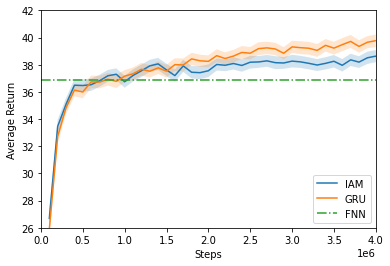

In [6]:
log_iam = 'results/IAM/'
log_gru = 'results/GRU/'
log_fnn = 'results/FNN/'
log_fnn8 = 'results/FNN8/'

plot_result(log_iam)
plot_result(log_gru)
plot_result_line(log_fnn, pos=7e5)
plot_result_line(log_fnn8, pos=7e5)

plt.ylabel("Average Return")
plt.xlabel("Steps")
plt.legend(["IAM", "GRU", "FNN (1 obs)", "FNN (8 obs)"], loc="lower right")
plt.savefig("results/result.png")